#  1 N-gram language model (6%)

1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints. 

1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n. 

1.3 What is the probability of the sentence. "ኢትዮጵያ ታሪካዊ ሀገር ናት ". You can also try more sentences. 

1.4 Generate random sentences using n-grams; explain what happens as n increases, based on your output. 

# 1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk import ngrams
from collections import Counter
import random
import re
import math

In [2]:
# Read the content of GPAC.txt
with open("GPAC.txt", "r", encoding="utf-8") as file:
    sentence = file.read()

In [3]:
# https://www.alanwood.net/unicode/ethiopic.html
pattern = r'[^\u1200-\u135A\s]|(?<!\S)(ዓ|ም|እ|ኤ|አ)(?=\s|$)'

# Split the text using the regex pattern to remove Amharic punctuation
text_without_amharic_punctuation = re.sub(pattern, '', sentence)

In [4]:
words = text_without_amharic_punctuation.split()

In [5]:
n = 1
Unigram = ngrams(words, n)

print("Results for Unigram!")
i = 0
for u_gram in Unigram:
    print(u_gram)
    i += 1
    if i>= 5: break

Results for Unigram!
('ምን',)
('መሰላችሁ',)
('አንባቢያን',)
('ኢትዮጵያ',)
('በተደጋጋሚ',)


In [6]:
n = 2
Bigram = ngrams(words, n)

print("\nResults for Bigram!")
for b_gram in Bigram:
    print(b_gram)
    i += 1
    if i>= 10: break


Results for Bigram!
('ምን', 'መሰላችሁ')
('መሰላችሁ', 'አንባቢያን')
('አንባቢያን', 'ኢትዮጵያ')
('ኢትዮጵያ', 'በተደጋጋሚ')
('በተደጋጋሚ', 'ጥሪው')


In [7]:
n = 3
Trigram = ngrams(words, n)

print("\nResults for Trigram!")
for t_gram in Trigram:
    print(t_gram)
    i += 1
    if i>= 15: break


Results for Trigram!
('ምን', 'መሰላችሁ', 'አንባቢያን')
('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ')
('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ')
('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው')
('በተደጋጋሚ', 'ጥሪው', 'ደርሷት')


In [8]:
n = 4
n_gram = ngrams(words, n)

print("\nResults for n gram!")
for grams in n_gram:
    print(grams)
    i += 1
    if i>=20: break


Results for n gram!
('ምን', 'መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ')
('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ')
('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው')
('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት')
('በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው')


# 1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.

In [9]:
# Function to calculate n-grams and their probabilities
def calculate_ngram_probabilities(n, words):
    n_grams = list(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    
    # Calculate probabilities
    total_n_grams = len(n_grams)
    probabilities = {gram: count / total_n_grams for gram, count in n_gram_counts.items()}
    
    n_probability = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
    
    # Sort probabilities to find top 10 most likely n-grams
    top_10 = n_probability[:10]
    
    print(f"\nTop 10 most likely {n}-grams and their probabilities:")
    for gram, prob in top_10:
        print(f"{gram}: {prob}")
        
    return n_probability



In [10]:
# Calculate probabilities and find top 10 for each n
unigram_probabilities = calculate_ngram_probabilities(1, words)


Top 10 most likely 1-grams and their probabilities:
('ነው',): 0.014912639662231207
('ላይ',): 0.010011003913105459
('ውስጥ',): 0.004593944964351963
('ወደ',): 0.004375291835513666
('እና',): 0.004225719189059891
('ጋር',): 0.0038672331513917614
('ግን',): 0.0035945204979213954
('ነበር',): 0.003532220677561169
('ጊዜ',): 0.003235835419293648
('ነገር',): 0.002870104290695447


In [11]:
bigram_probabilities = calculate_ngram_probabilities(2, words)


Top 10 most likely 2-grams and their probabilities:
('ነገር', 'ግን'): 0.0005779751462062023
('ብቻ', 'ሳይሆን'): 0.000427646142111107
('ማለት', 'ነው'): 0.0004087505200940344
('አዲስ', 'አበባ'): 0.0004083258993745496
('ምክር', 'ቤት'): 0.00031672724854319264
('ብቻ', 'ነው'): 0.0003161699338488689
('በአዲስ', 'አበባ'): 0.00030897792041259547
('ነው', 'ይህ'): 0.0002678693270074754
('ይሁን', 'እንጂ'): 0.0002500750649815664
('ጠቅላይ', 'ሚኒስትር'): 0.00024950448088975873


In [12]:
trigram_probabilities = calculate_ngram_probabilities(3, words)


Top 10 most likely 3-grams and their probabilities:
('ዓም', 'ኢሳት', 'ዜና'): 7.966946355049725e-05
('ተወካዮች', 'ምክር', 'ቤት'): 7.421574111224702e-05
('በሌላ', 'በኩል', 'ደግሞ'): 6.681141721798028e-05
('ቀን', 'ዓም', 'ኢሳት'): 6.625410251626129e-05
('ነው', 'ነገር', 'ግን'): 6.596217576774181e-05
('የአዲስ', 'አበባ', 'ከተማ'): 5.8597660066455e-05
('በዓለም', 'አቀፍ', 'ደረጃ'): 5.494857570996154e-05
('ከጊዜ', 'ወደ', 'ጊዜ'): 5.28520108796853e-05
('አበባ', 'ከተማ', 'አስተዳደር'): 5.2427390154566055e-05
('በአዲስ', 'አበባ', 'ከተማ'): 5.076871544706903e-05


In [13]:
fourgram_probabilities = calculate_ngram_probabilities(4, words)


Top 10 most likely 4-grams and their probabilities:
('ቀን', 'ዓም', 'ኢሳት', 'ዜና'): 6.515274337502091e-05
('ከ', 'ሚሊዮን', 'ብር', 'በላይ'): 3.6371419468621656e-05
('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር'): 3.0240957668365106e-05
('በ', 'የኔ', 'ሃሳብ', 'ዓምድ'): 2.7613616896826585e-05
('ኦርቶዶክስ', 'ተዋሕዶ', 'ቤተ', 'ክርስቲያን'): 2.3155099223912728e-05
('የሕዝብ', 'ተወካዮች', 'ምክር', 'ቤት'): 2.3141829826076676e-05
('ጠቅላይ', 'ሚኒስትር', 'መለስ', 'ዜናዊ'): 1.750233574575409e-05
('ወሮበላ', 'የዘራፊ', 'ቡድን', 'ስብስብ'): 1.6891943445295647e-05
('ከ', 'ቢሊዮን', 'ብር', 'በላይ'): 1.674598006909906e-05
('የኢትዮጵያ', 'ኦርቶዶክስ', 'ተዋሕዶ', 'ቤተ'): 1.6679633079918798e-05


# 1.3 What is the probability of the sentence. "ኢትዮጵያ ታሪካዊ ሀገር ናት ". You can also try more sentences.



In [14]:
# Example probabilities for the sentence "ኢትዮጵያ ታሪካዊ ሀገር ናት" with trigrams
 
check_sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት" # 7.043076570343299e-16 if n = 3 # 0.0001 if n = 4
# check_sentence = "ኦርቶዶክስ ተዋሕዶ ቤተ ክርስቲያን" # 6.616745059387278e-10 # 0.0001 if n = 4
# check_sentence = "የአዲስ አበባ ከተማ" # 1.0 if n = 4 # 5.8597660066455e-05 if n = 3 # 1e-08 if n = 2 # 1e-12 if n = 1
check_words = check_sentence.split()

n = 3  # Using trigrams for this example

# Function to calculate sentence probability based on n-grams
def calculate_sentence_probability(n, words, n_gram_probabilities):
    n_grams = list(zip(*[words[i:] for i in range(n)]))
    sentence_probability = 1.0

    for gram in n_grams:
        if gram in n_gram_probabilities:
            sentence_probability *= n_gram_probabilities[gram]
        else:
            # Handle unseen n-grams (e.g., smoothing techniques)
            # For simplicity, assuming a very small probability for unseen n-grams
            sentence_probability *= 0.0001  # Placeholder value for unseen n-grams
    
    return sentence_probability

# Calculate probability of the sentence using pre-calculated trigram probabilities
probability = calculate_sentence_probability(n, check_words, dict(trigram_probabilities))
print(f"Probability of the sentence '{check_sentence}': {probability}")

Probability of the sentence 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 7.043076570343299e-16


# 1.4 Generate random sentences using n-grams; explain what happens as n increases, based on your output.

In [15]:
# Create a dictionary to store probabilities for each n
ngram_probabilities = {}

# Function to calculate n-grams and their probabilities
def calculate_ngram_probabilities(n, words):
    n_grams = list(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    
    # Calculate probabilities
    total_n_grams = len(n_grams)
    probabilities = {gram: count / total_n_grams for gram, count in n_gram_counts.items()}
    
    # Store probabilities in the dictionary
    ngram_probabilities[n] = probabilities

# Calculate probabilities for each n
for n in range(1, 5):
    calculate_ngram_probabilities(n, words)

# Function to generate random sentences based on n-grams and probabilities
def generate_random_sentence(n):
    if n not in ngram_probabilities:
        print(f"No probabilities found for n={n}. Please calculate probabilities first.")
        return
    
    probabilities = ngram_probabilities[n]
    sentence = []
    
    while True:
        # Start with the first n-1 words from the original sentence
        if len(sentence) < n - 1:
            sentence.extend(words[:n - 1])
        else:
            previous_n_gram = tuple(sentence[-n+1:]) if n > 1 else tuple(sentence)
            
            # Find the next word based on probabilities
            possible_next_words = [word for word in probabilities if word[:-1] == previous_n_gram]
            
            if not possible_next_words:
                break
            
            next_word = random.choices(possible_next_words, weights=[probabilities[word] for word in possible_next_words])[0][-1]
            sentence.append(next_word)
    
    return ' '.join(sentence)



In [16]:
# Generate random sentences for different values of n
# for n in range(1, 5):
n = 1
print(f"\nGenerated random sentences using {n}-grams:")
for _ in range(5):  # Generate 5 sentences
    random_sentence = generate_random_sentence(n)
    print(random_sentence)



Generated random sentences using 1-grams:
ቢሆንም
ሰጥታችሁ
ዘመን
ኢንፎርሜሽን
ወዳጁን


In [ ]:
random_sentence = generate_random_sentence(2)
print(random_sentence)

In [34]:
n = 2
print(f"\nGenerated random sentences using {n}-grams:")
for _ in range(5):  # Generate 5 sentences
    random_sentence = generate_random_sentence(n)
    print(random_sentence)


Generated random sentences using 2-grams:



KeyboardInterrupt



In [ ]:
n = 3
print(f"\nGenerated random sentences using {n}-grams:")
for _ in range(5):  # Generate 5 sentences
    random_sentence = generate_random_sentence(n)
    print(random_sentence)

In [ ]:
n = 4
print(f"\nGenerated random sentences using {n}-grams:")
for _ in range(5):  # Generate 5 sentences
    random_sentence = generate_random_sentence(n)
    print(random_sentence)

## As the value of n increases in n-grams, there are distinct changes in the generated random sentences:

#### 1. Unigram (n=1):
* Sentences are typically nonsensical as they rely solely on individual words.
* Lack of contextual information leads to incoherent and unrelated sequences of words.

#### 2. Bigram (n=2):
* Sentences start to exhibit some coherence by pairing words together.
* There's a bit more contextual relevance as words are linked, but overall sentence structure may still lack fluency.

#### 3. Trigram (n=3):
* Sentences become more contextually relevant and coherent.
* The inclusion of three-word sequences allows for more structured and occasionally meaningful phrases, following observed patterns from the training data.

#### 4. Higher n-grams (n > 3):
* Sentences become increasingly context-specific and limited in diversity.
* As n increases, sentences might mirror segments from the training data more closely, potentially becoming more coherent but less flexible or creative.
* The higher the n, the more likely the generated sentences might resemble phrases or sentences directly lifted from the training data, limiting novelty and diversity.

# 2 Evaluate these Language Models Using Intrinsic Evaluation Method 

In [ ]:
# Assuming 'data' contains the entire dataset
# Split the data into 80% training and 20% test
train_data, test_data = train_test_split(words, test_size=0.2, random_state=42)

# Now you have 'train_data' for training your language model and 'test_data' for evaluation


# Assuming you have already split your data into 'train_data' and 'test_data'
n = 3  # Adjust the 'n' value for the desired n-gram model

# Create n-grams for training data
train_ngrams = list(ngrams(train_data, n))
train_ngram_counts = Counter(train_ngrams)
total_train_ngrams = len(train_ngrams)

# Calculate probabilities for n-grams in training data
train_probabilities = {gram: count / total_train_ngrams for gram, count in train_ngram_counts.items()}

# Function to calculate perplexity for test data
def calculate_perplexity(test_data, train_probabilities, n):
    test_ngrams = list(ngrams(test_data, n))
    total_test_ngrams = len(test_ngrams)
    
    # Calculate perplexity
    log_sum = 0
    for gram in test_ngrams:
        if gram in train_probabilities:
            log_sum += math.log2(1 / train_probabilities[gram])
    
    perplexity = 2 ** (log_sum / total_test_ngrams)
    return perplexity

# Calculate perplexity for the test data
test_perplexity = calculate_perplexity(test_data, train_probabilities, n)
print(f"Perplexity for the test data: {test_perplexity}")


# 3 Evaluate these Language Models Using Extrinsic Evaluation Method

In [ ]:
# Extract features using an n-gram language model
def extract_features(data, n):
    feature_list = []
    for sentence, label in data:
        words = sentence.split()
        n_grams = list(ngrams(words, n))
        n_gram_counts = Counter(n_grams)
        feature_list.append([n_gram_counts, label])
    return feature_list

# Train a logistic regression model using n-gram features
def train_sentiment_model(train_features):
    X_train = [feat[0] for feat in train_features]
    y_train = [feat[1] for feat in train_features]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    return clf

# Evaluate the sentiment model
def evaluate_sentiment_model(test_features, clf):
    X_test = [feat[0] for feat in test_features]
    y_test = [feat[1] for feat in test_features]
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Extract features from train and test data using n-grams
train_features = extract_features(train_data, n=3)
test_features = extract_features(test_data, n=3)

# Train the sentiment model using extracted features
sentiment_model = train_sentiment_model(train_features)

# Evaluate the sentiment model
accuracy = evaluate_sentiment_model(test_features, sentiment_model)
print(f"Accuracy of the sentiment model: {accuracy}")


# DONE

# PRACTICE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use(style='seaborn-v0_8')

df = pd.read_csv('all-data.csv', encoding = 'ISO-8859-1')
print(df.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [6]:
df['neutral'].value_counts()

neutral
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [7]:
y = df['neutral'].values
y.shape

(4845,)

In [11]:
x=df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].values
x.shape

(4845,)

In [12]:
from sklearn.model_selection import train_test_split

In [18]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print("x_train: ", x_train.shape, "\ny_train: ", y_train.shape, "\nx_test: ", x_test.shape, "\ny_test: ", y_test.shape)

x_train:  (2907,) 
y_train:  (2907,) 
x_test:  (1938,) 
y_test:  (1938,)


In [20]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [21]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [22]:
df_train.head()

,news,sentiment
0,For the new shares subscribed with stock optio...,neutral
1,Clothing retail chain Sepp+Æl+Æ 's sales incre...,positive
2,Both operating profit and net sales for the th...,positive
3,Benefon will turn the Salo unit into a B2B bus...,neutral
4,Sponda will record a profit from the sale of 8...,positive


In [23]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [24]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [25]:
df_test.head()

,news,sentiment
0,Operating profit for the nine-month period inc...,neutral
1,Harold W. Young is an independent broker worki...,positive
2,The value of the deal is estimated at between ...,positive
3,The workforce will be reduced also in the Amst...,neutral
4,"GUANGDONG , October 26 , SinoCast -- Nokia Tel...",positive


In [26]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
#defining the function to remove punctuation
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=[]  
    for i in text:     
        if i not in string.punctuation:
            ans.append(i)    
    return "".join(ans)

In [30]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [31]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,For the new shares subscribed with stock optio...,neutral
1,Clothing retail chain SeppÆlÆ s sales increase...,positive
2,Both operating profit and net sales for the th...,positive
3,Benefon will turn the Salo unit into a B2B bus...,neutral
4,Sponda will record a profit from the sale of 8...,positive


In [32]:
df_test.head()

,news,sentiment
0,Operating profit for the ninemonth period incr...,neutral
1,Harold W Young is an independent broker workin...,positive
2,The value of the deal is estimated at between ...,positive
3,The workforce will be reduced also in the Amst...,neutral
4,GUANGDONG October 26 SinoCast Nokia Telecom...,positive


In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tesfaye/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [34]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [35]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

# Creating Unigrams
### Let’s follow the steps below to create unigrams for the news column of the df_train data frame:

1. Create unigrams for each of the news records belonging to each of the three categories of sentiments.
2. Store the word and its count in the corresponding dictionaries.
3. Convert these dictionaries to corresponding data frames.
4. Fetch the top 10 most frequently used words.
5. Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.
#### Have a look at the codes below to understand the steps better.

In [36]:
from collections import defaultdict

In [37]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [38]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text):
        positiveValues[word]+=1

Sentence after removing stopwords: ['Clothing', 'retail', 'chain', 'SeppÆlÆ', 'sales', 'increased', '8', '', 'EUR', '1552', 'mn', '', 'operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '171', 'mn', '2004', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR16', '0', 'EUR139m', '', 'compared', 'corresponding', 'quarter', '2006', '']
Sentence after removing stopwords: ['Sponda', 'record', 'profit', 'sale', '85', 'mln', 'euro', '', '124', 'mln']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Metso', 'said', 'order', 'worth', 'around', '40', 'mln', 'eur', 'supply', 'kraftliner', 'board', 'machine', 'China', 'Lee', '', 'Man', 'Paper', 'Co', '']
Sentence after removing stopwords: ['OLeary', 'Material', 'Handling', 'Services', '', 'located', 'Perth', '', 'le

Sentence after removing stopwords: ['The', 'expansion', 'includes', 'doubling', 'floor', 'space', 'addition', 'lifting', 'capacity', 'production', 'equipment', '']
Sentence after removing stopwords: ['Nordea', 'Bank', '', 'STO', '', 'NDA', '', 'Sampo', 'Bank', 'helped', 'Finnish', 'real', 'estate', 'investment', 'company', 'Sponda', '', 'HEL', '', 'SDA1V', '', 'place', 'EUR100m', '', 'USD125', '4', '', 'domestic', 'bond', '', 'company', 'said', 'Friday', '']
Sentence after removing stopwords: ['Last', 'year', 'SysOpen', 'Digia', 'invested', 'IBM', 'product', 'knowhow', 'building', 'portal', 'trading', 'place', 'systems', 'successfully', 'implemented', 'customer', 'solutions', 'supported', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2009', '', 'Orion', 'net', 'profit', 'went', '338', '', 'yearonyear', 'EUR33m', '']
Sentence after removing stopwords: ['The', 'training', 'modules', 'aim', 'strengthening', 'public', 'accounting', 'abilities', 'fulfilling', 'communal

Sentence after removing stopwords: ['Sales', 'VAT', 'inclusive', 'expanded', '19', 'percent', '', '351', 'million', 'euros', '']
Sentence after removing stopwords: ['That', 'would', 'increase', 'estimated', 'sales', '117', 'million', 'last', 'year', '']
Sentence after removing stopwords: ['We', 'honored', 'acknowledged', 'commitment', 'industry', '', 'especially', 'Asia', 'Pacific', '', '']
Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords: ['According', 'Kesko', '', 'company', 'agreed', 'city', 'administration', 'lease', 'building', '2006', '', 'resettlement', 'construction', 'fivestar', 'hotel', 'Hilton', '120', 'rooms', '']
Sentence after removing stopwords: ['DMASIA16', 'August', '2006Benefon', 'extends', 'manufacturing', 'capability', 'ASMobile', '', '2006', 'Digitalmediaasiacom', '', 'DMA', 'Ltd', '']


Sentence after removing stopwords: ['Iggesunds', 'Bruk', 'Sweden', 'one', 'advanced', '', 'fully', 'integrated', 'pulp', 'paperboard', 'mills', 'world', '']
Sentence after removing stopwords: ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR', '415000', 'EUR', '74', 'million', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Viking', 'Line', 'head', 'Jan', 'Kaarstroem', 'told', 'TT', 'company', 'ferries', 'well', 'equipped', 'handle', 'ice', 'passengers', 'safe', '']
Sentence after removing stopwords: ['', 'We', 'pleased', 'welcome', 'Tapeks', 'Noma', 'Cramo', 'group', '']
Sentence after removing stopwords: ['', 'I', 'pleased', 'proud', 'performance', 'last', 'year', '', '', 'Chief', 'Executive', 'Juha', 'Rantanen', 'said', 'statement', '']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '06', 'mn', '', 'loss', 'EUR', '19mn', 'year', 'earlier', '']
Sentence after removing stopwords: ['Net', 'interest', 

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text):
        negativeValues[word]+=1

Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'loss', 'EUR0', '06', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'went', 'slightly', '251', 'mln', 'euro', '', '', '402', 'mln', '', 'first', 'half', '2008', '254', 'mln', 'euro', '', '', '407', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['Finnair', 'believes', 'strike', 'cause', 'daily', 'net', 'losses', 'excess', 'EUR', '2mn', 'due', 'canceled', 'reservations', 'passenger', 'rerouting', '']
Sentence after removing stopwords: ['At', '1201', 'pm', '', 'OMX', 'Helsinki', '25', '066', 'pct', '314357', 'OMX', 'Helsinki', '067', 'pct', 'lower', '1053074', '253', 'mln', 'eur', 'turnover', '']
Sentence after removing stopwords: ['Konecranes', 'previously', 'communicated', 'estimated', 'reduction', '1600', 'employees', 'group', 'level', '2009', '']
Sentence after removing stopwords: ['Operating', 'prof

Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'profit', 'EUR', '22', 'mn', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Vaisala', 'net', 'profit', 'third', 'quarter', '2007', 'dropped', '30', 'mln', 'euro', '', '', '43', 'mln', '', '68', 'mln', 'euro', '', '', '98', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['According', 'Arokarhu', '', 'purchases', 'scanned', 'cash', 'register', 'computer', 'disappeared', 'total', 'sum', 'key', 'pressed', '']
Sentence after removing stopwords: ['ADP', 'News', '', 'May', '29', '', '2009', '', 'Bank', 'America', 'BofA', 'downgraded', 'today', 'ratings', 'SwedishFinnish', 'paper', 'maker', 'Stora', 'Enso', 'Oyj', 'HEL', '', 'STERV', 'Finnish', 'sector', 'player', 'UPMKymmene', 'Oyj', 'HEL', '', 'UPM1V', '', 'underperf']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'inc

In [40]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text):
        neutralValues[word]+=1

Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register', '']
Sentence after removing stopwords: ['Benefon', 'turn', 'Salo', 'unit', 'B2B', 'business', 'unit', 'establish', 'B2C', 'business', 'unit', 'UK', '']
Sentence after removing stopwords: ['The', 'order', 'also', 'includes', 'extensive', 'maintenance', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'Central', 'Eastern', 'European', 'growth', 'strategy', '']
Sentence after removing stopwords: ['Elcoteq', 'global', 'network', 'After', 'Market', 'Service', 'sites', 'long', 'experience', 'serving', 'Consumer', 'Electronics', 'Systems', 'Solutions', 'customers', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comp

Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people', '']
Sentence after removing stopwords: ['The', 'results', 'enable', 'preparation', 'conceptual', 'plant', 'design', 'capital', 'estimates', '']
Sentence after removing stopwords: ['The', 'contracts', 'awarded', 'date', '', 'connection', 'system', '', 'amount', 'total', 'EUR', '36', 'million', '']
Sentence after removing stopwords: ['The', 'company', 'share', 'listed', 'Mid', 'Cap', 'segment', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damage', 'gave', 'vessel', 'permission', 'continue', 'Tallinn', 'around', '430', 'The', 'Norwegianregistered', 'MT', 'Sten', 'Nordic', 'carrying', '11000', 'tons', 'gas', 'oil', 'manned', 'Filipino', 'crew', '']
Sentence after removing stopwords: ['HKScan', '', 'headquartered', 'Turku', '', 'Finland', '', 'leading', 'northern', 'European', 'food', 'group', '10000', 'employees', 'nine', 'co

Sentence after removing stopwords: ['The', 'new', 'system', '', 'include', '60', 'MC3090', 'PDAs', 'Motorola', '', 'used', '60', 'Poundstretcher', 'operatives', 'across', '3', 'shifts', '', 'integrate', 'realtime', 'company', 'existing', 'Warehouse', 'Management', 'System', '', 'Aldata', 'GOLD', 'Stock', '', 'went', 'live', 'May', '2008', '']
Sentence after removing stopwords: ['Tyrvaan', 'Sanomat', '', 'published', 'twice', 'week', 'Tyrvaan', 'Sanomat', 'Oy', '', 'appears', 'Sastamala', 'Kiikoinen', '']
Sentence after removing stopwords: ['It', 'also', 'includes', 'installation', 'new', 'equipment', '', 'training', 'startup', 'services', '', 'well', 'service', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered',

Sentence after removing stopwords: ['The', 'first', 'charging', 'stations', 'made', 'available', 'already', '2008', 'whole', 'network', 'ready', '2010', '']
Sentence after removing stopwords: ['The', 'newspapers', 'Alma', 'Media', 'Arena', 'Partners', 'enter', 'cooperation', 'agreement', 'using', 'Alma', 'marketplace', 'services', 'respective', 'regions', '']
Sentence after removing stopwords: ['The', 'price', 'specified', 'completion', 'date', '']
Sentence after removing stopwords: ['According', 'Scanfil', 'President', 'Harri', 'Takanen', '', 'Scanfil', 'investment', 'activity', 'proceeded', 'according', 'strategy', 'several', 'fronts', '2010', '']
Sentence after removing stopwords: ['HUHTAMAKI', 'OYJ', 'STOCK', 'EXCHANGE', 'RELEASE', '', '1692008', 'AT', '1332', 'Huhtamaki', 'Capital', 'Markets', 'Day', 'institutional', 'investors', 'analysts', 'held', 'Espoo', '', 'September', '16', '', '2008', 'starting', '1330', 'pm', 'Finnish', 'time', '']
Sentence after removing stopwords: ['The

Sentence after removing stopwords: ['According', 'Eijkens', '', 'publisher', 'much', 'publish', 'colourful', 'books', '', 'publisher', 'provide', 'value', 'added', 'information', 'individualising', '']
Sentence after removing stopwords: ['Finnish', 'Talvivaara', 'Mining', 'Co', 'HEL', '', 'TLV1V', 'said', 'Thursday', 'picked', 'BofA', 'Merrill', 'Lynch', 'JPMorgan', 'NYSE', '', 'JPM', 'joint', 'bookrunners', 'planned', 'issue', 'convertible', 'notes', 'worth', 'EUR250m', 'USD332m', '']
Sentence after removing stopwords: ['The', 'decision', 'made', 'whether', 'group', 'agrees', 'import', 'Estonian', 'meat', 'meat', 'products', 'Finland', '', 'paper', 'added', '']
Sentence after removing stopwords: ['His', 'resignation', 'take', 'effect', 'immediately', '']
Sentence after removing stopwords: ['The', 'power', 'supplies', '', 'DC', 'power', 'systems', 'inverters', 'designed', 'manufactured', 'Efore', '', 'systems', 'incorporating', 'used', 'many', 'different', 'applications', '']
Sentence 

Sentence after removing stopwords: ['Aker', 'Yards', 'Finland', 'begin', 'using', 'Chinese', 'subcontractors', 'Finnish', 'shipyards', '']
Sentence after removing stopwords: ['Another', 'problem', 'colaflavoured', 'long', 'drinks', '']
Sentence after removing stopwords: ['In', 'first', 'quarter', '2008', '', 'Sacanfil', 'net', 'sales', 'totalled', 'EUR', '500', 'mn', 'operating', 'profit', 'EUR', '47', 'mn', '']
Sentence after removing stopwords: ['Through', 'partnership', 'Finnish', 'Paulig', 'Danish', 'subsidiary', 'Oscar', '', 'Puljonki', 'acquired', 'sales', 'organization', 'European', 'market', '']
Sentence after removing stopwords: ['Glaston', 'also', 'efficiency', 'measures', 'units', '']
Sentence after removing stopwords: ['The', 'share', 'capital', 'Alma', 'Media', 'Corporation', 'business', 'ID', '19447574is', 'EUR', '4503151380', 'divided', '75052523', 'shares', '']
Sentence after removing stopwords: ['Efore', 'decided', 'establish', 'company', 'eletric', 'vehicle', '', 'EV'

Sentence after removing stopwords: ['Following', 'transaction', '', 'Tulikivi', 'restructured', 'operations', 'Soapstone', 'Fireplaces', 'Business', '', 'Natural', 'Stone', 'Product', 'Business', 'Ceramic', 'Products', 'Business', 'units', '']
Sentence after removing stopwords: ['The', 'event', 'also', 'viewed', 'live', 'webcast', 'wwwcargoteccom', '']
Sentence after removing stopwords: ['The', 'total', 'value', 'project', 'valued', 'SEK', '30bn', '', 'EUR', '283', 'bn', 'USD', '381', 'bn', '', '']
Sentence after removing stopwords: ['The', 'company', 'split', 'two', 'parts', 'coming', 'months', '', 'Essent', 'owning', 'operating', 'production', 'supply', '', 'Enexis', 'owning', 'operating', 'grid', '']
Sentence after removing stopwords: ['Metso', 'Oyj', 'said', 'sold', 'spreader', 'roll', 'manufacturing', 'business', 'related', 'assets', 'town', 'Nokia', '', 'southern', 'Finland', '', 'group', 'Finnish', 'investors', '', 'operate', 'business', 'name', 'Finbow', 'Oy', '']
Sentence afte

In [41]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [42]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [43]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [44]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

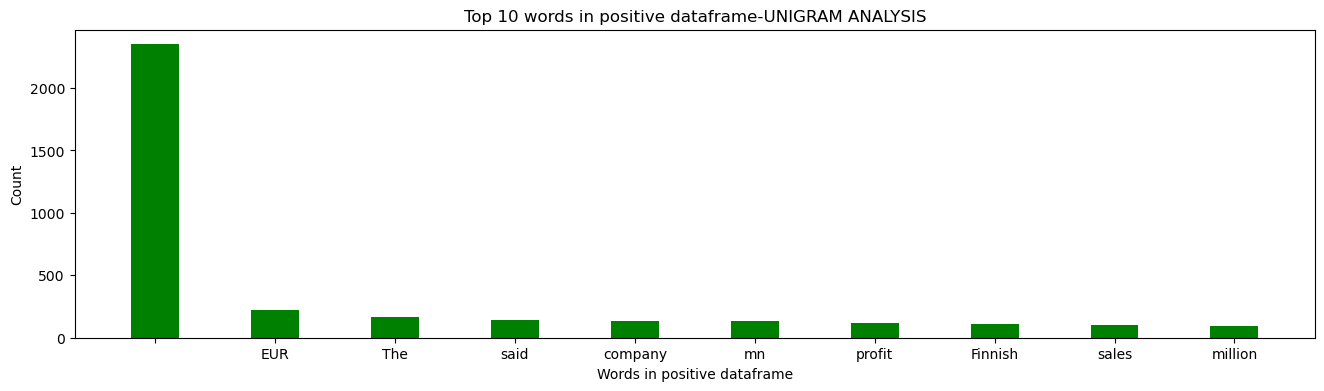

In [45]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

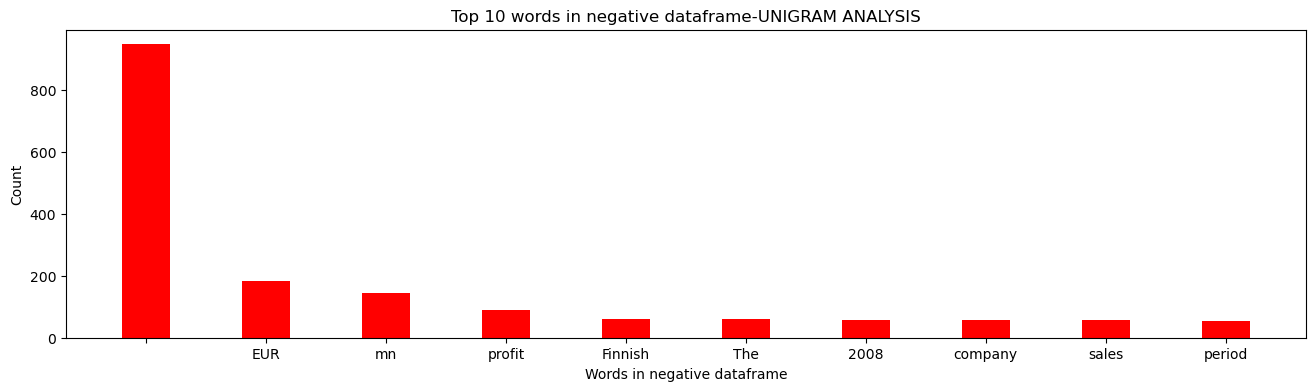

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

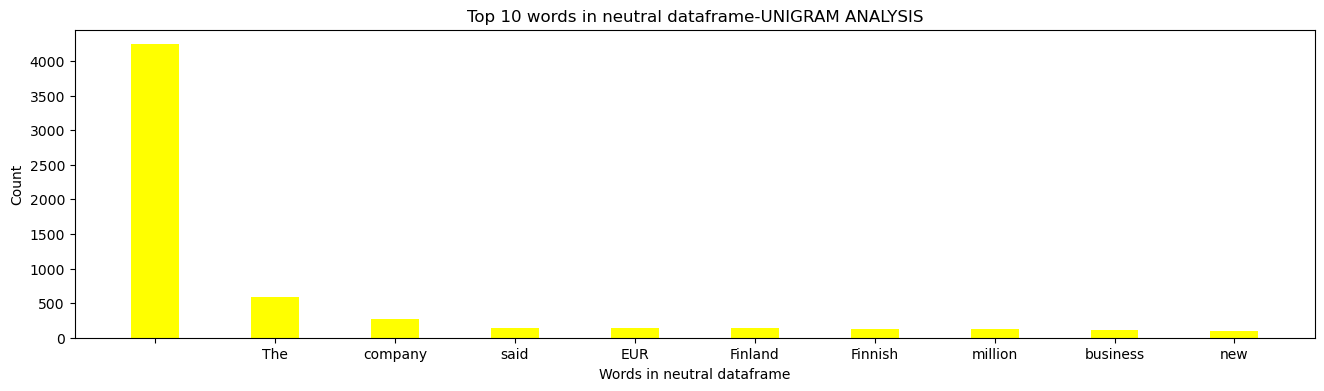

In [47]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

# Creating Bigrams
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 2 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [48]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [49]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1

Sentence after removing stopwords: ['Clothing', 'retail', 'chain', 'SeppÆlÆ', 'sales', 'increased', '8', '', 'EUR', '1552', 'mn', '', 'operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '171', 'mn', '2004', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR16', '0', 'EUR139m', '', 'compared', 'corresponding', 'quarter', '2006', '']
Sentence after removing stopwords: ['Sponda', 'record', 'profit', 'sale', '85', 'mln', 'euro', '', '124', 'mln']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Metso', 'said', 'order', 'worth', 'around', '40', 'mln', 'eur', 'supply', 'kraftliner', 'board', 'machine', 'China', 'Lee', '', 'Man', 'Paper', 'Co', '']
Sentence after removing stopwords: ['OLeary', 'Material', 'Handling', 'Services', '', 'located', 'Perth', '', 'le

Sentence after removing stopwords: ['The', 'restructuring', 'creates', 'efficient', 'organization', 'increased', 'operational', 'focus', 'stable', 'profitability', '', 'leads', 'efficient', 'production', '', 'said', 'Bo', 'Annvik', '', 'head', 'Specialty', 'Stainless', '']
Sentence after removing stopwords: ['The', 'pipeline', 'strong', '']
Sentence after removing stopwords: ['The', 'EPS', 'outlook', 'increased', '56', 'pct', '2007', '70', 'pct', '2008', '']
Sentence after removing stopwords: ['The', 'expansion', 'includes', 'doubling', 'floor', 'space', 'addition', 'lifting', 'capacity', 'production', 'equipment', '']
Sentence after removing stopwords: ['Nordea', 'Bank', '', 'STO', '', 'NDA', '', 'Sampo', 'Bank', 'helped', 'Finnish', 'real', 'estate', 'investment', 'company', 'Sponda', '', 'HEL', '', 'SDA1V', '', 'place', 'EUR100m', '', 'USD125', '4', '', 'domestic', 'bond', '', 'company', 'said', 'Friday', '']
Sentence after removing stopwords: ['Last', 'year', 'SysOpen', 'Digia', 'i

Sentence after removing stopwords: ['', 'Overall', '', 'pleased', 'startup', 'curve', '', 'pleased', 'quality', 'paper', '', '', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday', '']
Sentence after removing stopwords: ['According', 'Kesko', '', 'company', 'agreed', 'city', 'administration', 'lease', 'building', '2006', '', 'resettlement', 'construction', 'fivestar', 'hotel', 'Hilton', '120', 'rooms', '']
Sentence after removing stopwords: ['DMASIA16', 'August', '2006Benefon', 'extends', 'manufacturing', 'capability', 'ASMobile', '', '2006', 'Digitalmediaasiacom', '', 'DMA', 'Ltd', '']
Sentence after removing stopwords: ['Nokia', 'also', 'noted', 'average', 'selling', 'price', 'handsets', 'declined', 'period', '', 'though', 'mobile', 'phone', 'profit', 'margin', 'rose', '22', 'percent', '13', 'percent', 'yearago', 'quarter', '']
Sentence after removing stopwords: ['Profit', 'period', 'totaled', 'EUR', '394', 'mn', '', 'EUR', '339', 'mn', 'corresponding', 'period', '2006', 

Sentence after removing stopwords: ['', 'I', 'pleased', 'Bjorn', 'Wahlroos', 'accepted', 'nomination', '']
Sentence after removing stopwords: ['Brazilian', 'nonprofit', 'interbank', 'Camara', 'Interbancaria', 'de', 'Pagamentos', 'CIP', 'acquired', 'solutions', 'US', 'business', 'integration', 'solutions', 'provider', 'Sterling', 'Commerce', '', 'latter', 'company', 'said', 'statement', '']
Sentence after removing stopwords: ['Finnish', 'silicon', 'wafer', 'technology', 'company', 'Okmetic', 'Oyj', 'OMX', 'Helsinki', '', 'OKM1V', 'reported', 'Thursday', '30', 'October', 'operating', 'profit', 'EUR7', '4', 'JanuarySeptember', '2008', '', 'EUR6', '1', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['The', 'price', 'logs', 'clearly', 'improved', '2009', 'also', 'price', 'pulpwood', 'gone', '']
Sentence after removing stopwords: ['', 'I', 'warmly', 'welcome', 'Michael', 'Frei', 'Outotec', '']
Sentence after removing stopwords: ['Commission', 'income', 'increased',

In [50]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1

Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'loss', 'EUR0', '06', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'went', 'slightly', '251', 'mln', 'euro', '', '', '402', 'mln', '', 'first', 'half', '2008', '254', 'mln', 'euro', '', '', '407', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['Finnair', 'believes', 'strike', 'cause', 'daily', 'net', 'losses', 'excess', 'EUR', '2mn', 'due', 'canceled', 'reservations', 'passenger', 'rerouting', '']
Sentence after removing stopwords: ['At', '1201', 'pm', '', 'OMX', 'Helsinki', '25', '066', 'pct', '314357', 'OMX', 'Helsinki', '067', 'pct', 'lower', '1053074', '253', 'mln', 'eur', 'turnover', '']
Sentence after removing stopwords: ['Konecranes', 'previously', 'communicated', 'estimated', 'reduction', '1600', 'employees', 'group', 'level', '2009', '']
Sentence after removing stopwords: ['Operating', 'prof

Sentence after removing stopwords: ['ADP', 'News', '', 'May', '29', '', '2009', '', 'Bank', 'America', 'BofA', 'downgraded', 'today', 'ratings', 'SwedishFinnish', 'paper', 'maker', 'Stora', 'Enso', 'Oyj', 'HEL', '', 'STERV', 'Finnish', 'sector', 'player', 'UPMKymmene', 'Oyj', 'HEL', '', 'UPM1V', '', 'underperf']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Earlier', 'today', '', 'Geberit', 'Finnish', 'rival', 'Uponor', 'OYJ', 'cut', 'fullyear', 'sales', 'growth', 'forecast', '6', 'pct', '10', 'pct', '', 'blaming', 'tough', 'conditions', 'Germany', 'US', '', 'well', 'currency', 'factors', '']
Sentence after removing stopwords: ['Samsung', 'currently', 'occupies', 'third', 'place', 'lost', 'ground', 'quarter', '', 'dropping', '18', '', '111', '', 'share', 'overall', '']
Sentence after removin

In [51]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,2):
        neutralValues2[word]+=1

Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register', '']
Sentence after removing stopwords: ['Benefon', 'turn', 'Salo', 'unit', 'B2B', 'business', 'unit', 'establish', 'B2C', 'business', 'unit', 'UK', '']
Sentence after removing stopwords: ['The', 'order', 'also', 'includes', 'extensive', 'maintenance', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'Central', 'Eastern', 'European', 'growth', 'strategy', '']
Sentence after removing stopwords: ['Elcoteq', 'global', 'network', 'After', 'Market', 'Service', 'sites', 'long', 'experience', 'serving', 'Consumer', 'Electronics', 'Systems', 'Solutions', 'customers', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comp

Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damage', 'gave', 'vessel', 'permission', 'continue', 'Tallinn', 'around', '430', 'The', 'Norwegianregistered', 'MT', 'Sten', 'Nordic', 'carrying', '11000', 'tons', 'gas', 'oil', 'manned', 'Filipino', 'crew', '']
Sentence after removing stopwords: ['HKScan', '', 'headquartered', 'Turku', '', 'Finland', '', 'leading', 'northern', 'European', 'food', 'group', '10000', 'employees', 'nine', 'countries', '']
Sentence after removing stopwords: ['The', 'business', 'area', 'operations', 'Finland', '', 'Sweden', '', 'Denmark', '', 'Estonia', '', 'Latvia', 'Lithuania', '']
Sentence after removing stopwords: ['In', 'spring', '2006', '', 'total', '386530', 'Stock', 'Options', '2002', 'B', 'annulled', '']
Sentence after removing stopwords: ['Stichting', 'Pensioenfonds', 'ABP', '', '4', '118', '122', 'shares', 'representing', '519', '', 'share', 'capital', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'busi

Sentence after removing stopwords: ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered', 'placed', 'new', 'mill', 'annual', 'production', 'capacity', '40', '000', 'm3', 'overlaid', 'birch', 'plywood', '']
Sentence after removing stopwords: ['Currently', '', '95', '', 'Trainers', 'House', 'revenues', 'attributed', 'Finnish', 'market', '']
Sentence after removing stopwords: ['Tecnotree', 'convergent', 'charging', 'solution', 'includes', 'functionality', 'prepaid', 'postpaid', 'billing', '', 'charging', 'rating', 'voice', 'calls', '', 'video', 'calls', 'raw', 'data', 'traffic', 'mobile', 'fixed', 'networks', '']
Sentence after removing stopwords: ['The', 'rewards', 'paid', 'basis', 'earning', 'period', '2011', 'correspond', 'value', 'maximum', 'total', '364000', 'Componenta', 'Corporation', 'shares', 'includin

Sentence after removing stopwords: ['The', 'Finnish', 'real', 'estate', 'investment', 'company', 'Interavanti', 'Oyj', 'said', 'Monday', '', '22', 'September', '', 'agreed', 'sell', '65', '', 'ownership', 'Finnish', 'ticket', 'service', 'company', 'Lippupiste', 'Oy', 'CTS', 'Eventim', 'AG', '', '561', '', '', 'managing', 'director', 'Lippupiste', 'Oy', '']
Sentence after removing stopwords: ['The', 'product', 'range', 'includes', 'marinated', 'olives', '', 'cold', 'cuts', '', 'pates', '', 'example', '']
Sentence after removing stopwords: ['Customers', 'wide', 'range', 'industries', 'use', 'stainless', 'steel', 'services', 'worldwide', '']
Sentence after removing stopwords: ['The', 'duration', 'layoffs', 'per', 'employee', 'vary', 'one', 'six', 'weeks', '']
Sentence after removing stopwords: ['Upon', 'completion', 'sale', 'Proha', 'would', 'get', 'USD12', '7', 'stake', 'Artemis', '']
Sentence after removing stopwords: ['Proline', 'Plus', 'mechanical', 'liquid', 'handling', 'device', 'ro

Sentence after removing stopwords: ['', 'Among', 'Finnish', 'shares', 'traded', 'US', '', 'Stora', 'Enso', 'closed', '033', 'pct', 'lower', '1211', 'eur', '', 'UPMKymmene', '028', 'pct', '1810', 'eur', '', 'Metso', '013', 'pct', '3106', 'eur', '']
Sentence after removing stopwords: ['Today', 'orange', 'scissors', 'iconic', 'symbol', 'excellent', 'ergonomic', 'design', 'superior', 'quality', 'associated', 'every', 'product', 'Fiskars', '']
Sentence after removing stopwords: ['Typical', 'enduses', 'include', 'roof', 'structures', '', 'floorings', '', 'walls', 'ceilings', '', 'nonvisible', 'structures', 'vehicles', '', 'packaging', 'boxes', '', 'construction', 'site', 'structures', '', 'fencing', 'shelters', '', 'formwork', 'limited', 'number', 'concrete', 'pourings', '']
Sentence after removing stopwords: ['Latin', 'America', 'currently', 'accounts', 'approximately', '40', '', 'sales', 'Finnish', 'BSSOSS', 'VAS', 'supplier', 'telecoms', 'operators', 'Tecnotree', '', 'company', 'president

Sentence after removing stopwords: ['Finnish', 'fibrebased', 'materials', 'maker', 'Ahlstrom', 'Corp', '', 'HEL', '', 'AHL1V', '', 'said', 'today', 'decided', 'close', 'spunlace', 'composite', 'production', 'line', 'number', '23', 'Chirnside', 'plant', 'UK', 'end', 'March', '2011', '']
Sentence after removing stopwords: ['What', 'would', 'like', 'see', 'changed', 'Nokia', 'next', 'attempt', '']
Sentence after removing stopwords: ['Finnish', 'paper', 'maker', 'UPMKymmene', 'Corp', 'Monday', 'announced', 'sale', 'wrapping', 'unit', 'Walki', 'Wisa', 'CapMan', 'investment', 'group', 'move', 'concentrate', 'core', 'business', '']
Sentence after removing stopwords: ['The', 'EB', 'Tough', 'VoIP', 'Field', 'Phone', 'equipped', 'integrated', 'speaker', '', 'Ethernet', 'SHDSL', 'connectivity', '', 'enables', 'several', 'innovative', 'applications', '']
Sentence after removing stopwords: ['Kemira', 'supply', 'additional', 'volumes', 'iron', 'coagulants', 'company', 'plant', 'Helsingborg', '', 'Sw

Sentence after removing stopwords: ['Metso', 'Oyj', 'said', 'sold', 'spreader', 'roll', 'manufacturing', 'business', 'related', 'assets', 'town', 'Nokia', '', 'southern', 'Finland', '', 'group', 'Finnish', 'investors', '', 'operate', 'business', 'name', 'Finbow', 'Oy', '']
Sentence after removing stopwords: ['The', 'Board', 'Directors', 'authorized', 'decide', 'terms', 'share', 'issue', '']
Sentence after removing stopwords: ['The', 'operator', 'one', '6', 'operators', 'granted', 'WiMAX', 'license', 'Taiwan', '', 'hopes', 'first', 'launch', 'commercial', 'services', 'early', '2009', '']
Sentence after removing stopwords: ['The', 'buildings', '', '40', 'condominiums', '', 'built', '4', '5', 'stages', '']
Sentence after removing stopwords: ['The', 'first', 'quarter', 'expected', 'line', 'analysts', '', 'forecasts', '']
Sentence after removing stopwords: ['The', 'total', 'emissions', 'reduction', '1999', '2017', 'thus', '41', '', '']
Sentence after removing stopwords: ['Competition', 'aut

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [52]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [53]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [54]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [55]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [57]:
plt.figure(1,figsize=(16,4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

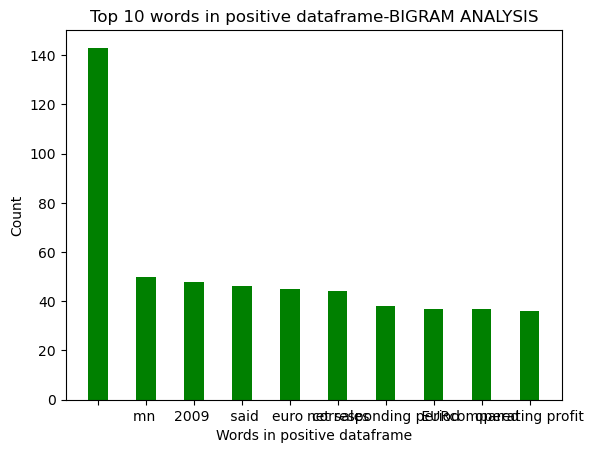

In [64]:
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

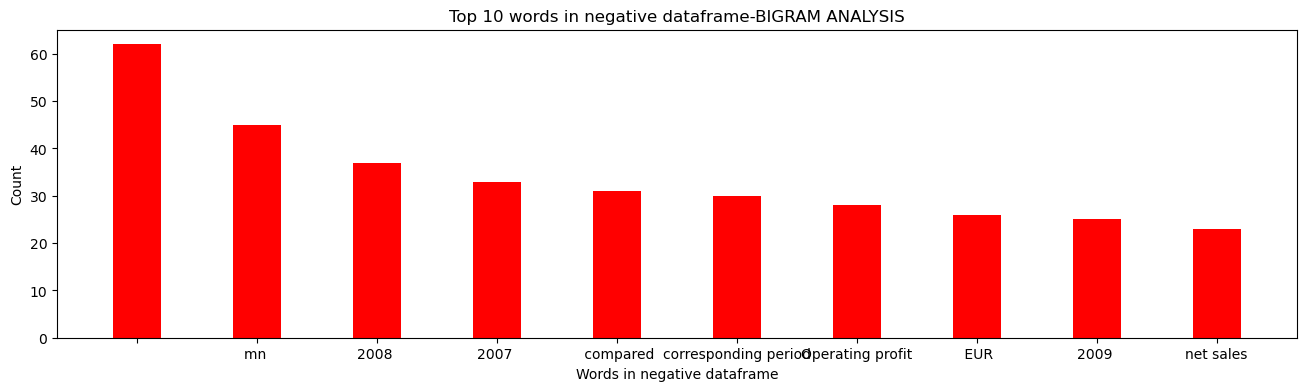

In [66]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red', width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

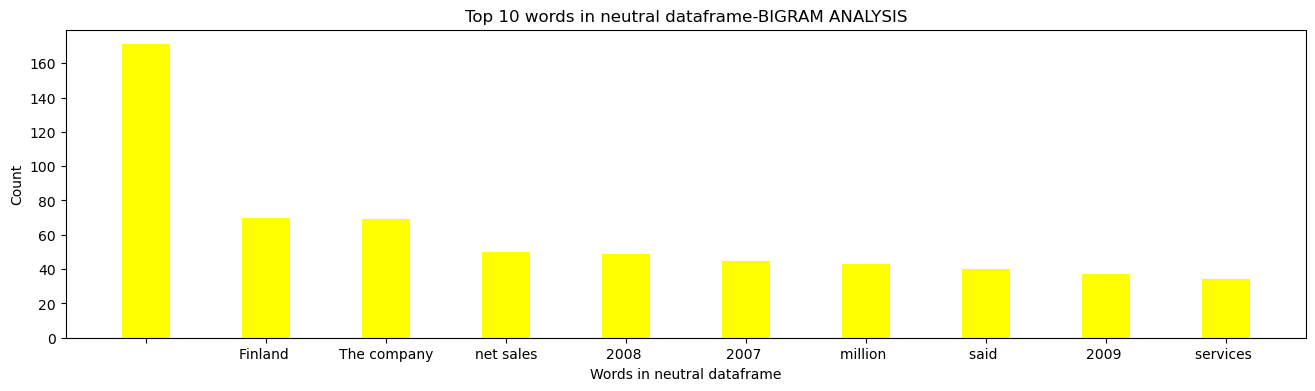

In [67]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow', width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

# Creating Trigrams
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 3 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [68]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [69]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,3):
        positiveValues3[word]+=1

Sentence after removing stopwords: ['Clothing', 'retail', 'chain', 'SeppÆlÆ', 'sales', 'increased', '8', '', 'EUR', '1552', 'mn', '', 'operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '171', 'mn', '2004', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR16', '0', 'EUR139m', '', 'compared', 'corresponding', 'quarter', '2006', '']
Sentence after removing stopwords: ['Sponda', 'record', 'profit', 'sale', '85', 'mln', 'euro', '', '124', 'mln']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Metso', 'said', 'order', 'worth', 'around', '40', 'mln', 'eur', 'supply', 'kraftliner', 'board', 'machine', 'China', 'Lee', '', 'Man', 'Paper', 'Co', '']
Sentence after removing stopwords: ['OLeary', 'Material', 'Handling', 'Services', '', 'located', 'Perth', '', 'le

Sentence after removing stopwords: ['Last', 'year', 'SysOpen', 'Digia', 'invested', 'IBM', 'product', 'knowhow', 'building', 'portal', 'trading', 'place', 'systems', 'successfully', 'implemented', 'customer', 'solutions', 'supported', '']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2009', '', 'Orion', 'net', 'profit', 'went', '338', '', 'yearonyear', 'EUR33m', '']
Sentence after removing stopwords: ['The', 'training', 'modules', 'aim', 'strengthening', 'public', 'accounting', 'abilities', 'fulfilling', 'communal', 'project', 'management', '']
Sentence after removing stopwords: ['The', 'company', 'goal', 'achieve', 'annual', 'savings', 'EUR', '2', 'million', '', 'USD', '27', '', '', 'two', 'thirds', 'realized', '2010', '']
Sentence after removing stopwords: ['The', 'cooperation', 'double', 'The', 'Switch', 'converter', 'capacity', '']
Sentence after removing stopwords: ['The', 'offer', 'represents', 'premium', '24', '', 'stock', 'closing', 'price', 'Friday', '']
Sent

Sentence after removing stopwords: ['Last', 'year', 'net', 'sales', 'rose', 'EUR', '683', 'million', 'EUR', '622', 'million', '']
Sentence after removing stopwords: ['During', 'past', 'decade', 'gradually', 'divested', 'noncore', 'assets', 'bought', 'several', 'sports', 'equipment', 'makers', '', 'including', 'Californiabased', 'Fitness', 'Products', 'International', 'Sparks', '', 'Nevadabased', 'ATEC', '', 'leading', 'maker', 'baseball', 'softball', 'pitching', 'machines', '']
Sentence after removing stopwords: ['The', 'Ministry', 'Water', 'Tanzania', 'awarded', 'Poyry', 'water', 'sanitation', 'engineering', 'assignment', 'rehabilitation', 'extension', 'water', 'supply', 'sanitation', 'infrastructure', 'Bukoba', 'Musoma', '', 'situated', 'Lake', 'Victoria', 'northern', 'Tanzania', '']
Sentence after removing stopwords: ['Diluted', 'earnings', 'per', 'share', '', 'EPS', '', 'rose', 'EUR', '368', 'EUR', '050', '']
Sentence after removing stopwords: ['The', 'item', 'included', 'restructu

Sentence after removing stopwords: ['Actions', 'improve', 'operational', 'efficiency', 'adjust', 'operations', 'expected', 'deliver', 'annualised', 'permanent', 'cost', 'savings', 'around', 'EUR', '45', 'million', 'effected', 'mostly', 'first', 'half', '2010', '']
Sentence after removing stopwords: ['', 'The', 'second', 'quarter', '2010', 'firstquarter', 'growth', 'net', 'sales', 'since', 'third', 'quarter', 'of2008', '', '', 'said', 'Magnus', 'Rosen', '', 'Ramirent', 'CEO', '']
Sentence after removing stopwords: ['OUTOTEC', 'OYJ', 'PRESS', 'RELEASE', 'DECEMBER', '4', '', '2009', '1030', 'AM', 'Outotec', 'establishes', 'new', 'subsidiary', 'Kolkata', 'Outotec', 'established', 'subsidiary', 'India', 'order', 'better', 'serve', 'Indian', 'customers', 'increase', 'business', 'growing', 'Indian', 'market', '']
Sentence after removing stopwords: ['', 'ADPnews', '', '', 'Nov', '9', '', '2009', '', 'Four', 'companies', 'agreed', 'buy', 'combined', 'SEK', '59', 'billion', '', 'USD', '854mEUR',

In [70]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,3):
        negativeValues3[word]+=1

Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'loss', 'EUR0', '06', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'went', 'slightly', '251', 'mln', 'euro', '', '', '402', 'mln', '', 'first', 'half', '2008', '254', 'mln', 'euro', '', '', '407', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['Finnair', 'believes', 'strike', 'cause', 'daily', 'net', 'losses', 'excess', 'EUR', '2mn', 'due', 'canceled', 'reservations', 'passenger', 'rerouting', '']
Sentence after removing stopwords: ['At', '1201', 'pm', '', 'OMX', 'Helsinki', '25', '066', 'pct', '314357', 'OMX', 'Helsinki', '067', 'pct', 'lower', '1053074', '253', 'mln', 'eur', 'turnover', '']
Sentence after removing stopwords: ['Konecranes', 'previously', 'communicated', 'estimated', 'reduction', '1600', 'employees', 'group', 'level', '2009', '']
Sentence after removing stopwords: ['Operating', 'prof

Sentence after removing stopwords: ['ADP', 'News', '', 'May', '29', '', '2009', '', 'Bank', 'America', 'BofA', 'downgraded', 'today', 'ratings', 'SwedishFinnish', 'paper', 'maker', 'Stora', 'Enso', 'Oyj', 'HEL', '', 'STERV', 'Finnish', 'sector', 'player', 'UPMKymmene', 'Oyj', 'HEL', '', 'UPM1V', '', 'underperf']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Earlier', 'today', '', 'Geberit', 'Finnish', 'rival', 'Uponor', 'OYJ', 'cut', 'fullyear', 'sales', 'growth', 'forecast', '6', 'pct', '10', 'pct', '', 'blaming', 'tough', 'conditions', 'Germany', 'US', '', 'well', 'currency', 'factors', '']
Sentence after removing stopwords: ['Samsung', 'currently', 'occupies', 'third', 'place', 'lost', 'ground', 'quarter', '', 'dropping', '18', '', '111', '', 'share', 'overall', '']
Sentence after removin

In [71]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,3):
        neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues


Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register', '']
Sentence after removing stopwords: ['Benefon', 'turn', 'Salo', 'unit', 'B2B', 'business', 'unit', 'establish', 'B2C', 'business', 'unit', 'UK', '']
Sentence after removing stopwords: ['The', 'order', 'also', 'includes', 'extensive', 'maintenance', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'Central', 'Eastern', 'European', 'growth', 'strategy', '']
Sentence after removing stopwords: ['Elcoteq', 'global', 'network', 'After', 'Market', 'Service', 'sites', 'long', 'experience', 'serving', 'Consumer', 'Electronics', 'Systems', 'Solutions', 'customers', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comp

Sentence after removing stopwords: ['In', 'note', 'clients', 'published', '', 'Dutch', 'broker', 'described', 'company', 'third', 'quarter', 'results', '', 'soft', '', '', 'although', 'also', 'noted', 'Elcoteq', 'retained', 'guidance', '', 'dealers', 'said', '']
Sentence after removing stopwords: ['LT', 'also', 'made', 'commitment', 'redeem', 'remaining', 'shares', 'end', '2011', '']
Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people', '']
Sentence after removing stopwords: ['The', 'results', 'enable', 'preparation', 'conceptual', 'plant', 'design', 'capital', 'estimates', '']
Sentence after removing stopwords: ['The', 'contracts', 'awarded', 'date', '', 'connection', 'system', '', 'amount', 'total', 'EUR', '36', 'million', '']
Sentence after removing stopwords: ['The', 'company', 'share', 'listed', 'Mid', 'Cap', 'segment', 'NASDAQ', 'OMX', 'Helsinki', '']
Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damag

Sentence after removing stopwords: ['The', 'new', 'system', '', 'include', '60', 'MC3090', 'PDAs', 'Motorola', '', 'used', '60', 'Poundstretcher', 'operatives', 'across', '3', 'shifts', '', 'integrate', 'realtime', 'company', 'existing', 'Warehouse', 'Management', 'System', '', 'Aldata', 'GOLD', 'Stock', '', 'went', 'live', 'May', '2008', '']
Sentence after removing stopwords: ['Tyrvaan', 'Sanomat', '', 'published', 'twice', 'week', 'Tyrvaan', 'Sanomat', 'Oy', '', 'appears', 'Sastamala', 'Kiikoinen', '']
Sentence after removing stopwords: ['It', 'also', 'includes', 'installation', 'new', 'equipment', '', 'training', 'startup', 'services', '', 'well', 'service', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered',

Sentence after removing stopwords: ['The', 'Finnish', 'real', 'estate', 'investment', 'company', 'Interavanti', 'Oyj', 'said', 'Monday', '', '22', 'September', '', 'agreed', 'sell', '65', '', 'ownership', 'Finnish', 'ticket', 'service', 'company', 'Lippupiste', 'Oy', 'CTS', 'Eventim', 'AG', '', '561', '', '', 'managing', 'director', 'Lippupiste', 'Oy', '']
Sentence after removing stopwords: ['The', 'product', 'range', 'includes', 'marinated', 'olives', '', 'cold', 'cuts', '', 'pates', '', 'example', '']
Sentence after removing stopwords: ['Customers', 'wide', 'range', 'industries', 'use', 'stainless', 'steel', 'services', 'worldwide', '']
Sentence after removing stopwords: ['The', 'duration', 'layoffs', 'per', 'employee', 'vary', 'one', 'six', 'weeks', '']
Sentence after removing stopwords: ['Upon', 'completion', 'sale', 'Proha', 'would', 'get', 'USD12', '7', 'stake', 'Artemis', '']
Sentence after removing stopwords: ['Proline', 'Plus', 'mechanical', 'liquid', 'handling', 'device', 'ro

Sentence after removing stopwords: ['', 'Among', 'Finnish', 'shares', 'traded', 'US', '', 'Stora', 'Enso', 'closed', '033', 'pct', 'lower', '1211', 'eur', '', 'UPMKymmene', '028', 'pct', '1810', 'eur', '', 'Metso', '013', 'pct', '3106', 'eur', '']
Sentence after removing stopwords: ['Today', 'orange', 'scissors', 'iconic', 'symbol', 'excellent', 'ergonomic', 'design', 'superior', 'quality', 'associated', 'every', 'product', 'Fiskars', '']
Sentence after removing stopwords: ['Typical', 'enduses', 'include', 'roof', 'structures', '', 'floorings', '', 'walls', 'ceilings', '', 'nonvisible', 'structures', 'vehicles', '', 'packaging', 'boxes', '', 'construction', 'site', 'structures', '', 'fencing', 'shelters', '', 'formwork', 'limited', 'number', 'concrete', 'pourings', '']
Sentence after removing stopwords: ['Latin', 'America', 'currently', 'accounts', 'approximately', '40', '', 'sales', 'Finnish', 'BSSOSS', 'VAS', 'supplier', 'telecoms', 'operators', 'Tecnotree', '', 'company', 'president

Sentence after removing stopwords: ['The', 'company', 'equipment', 'rental', 'portfolio', 'consists', 'primarily', 'tools', 'small', 'midsized', 'customers', 'construction', 'industry', '']
Sentence after removing stopwords: ['Sanoma', 'Learning', '', 'Literature', '', 'offering', 'print', 'digital', 'learning', 'materials', '', 'present', 'eleven', 'countries', '']
Sentence after removing stopwords: ['Altimo', 'previously', 'agreed', 'similar', 'deal', 'Telenor', 'merge', 'stakes', 'VimpelCom', 'KyivstarGSM', '']
Sentence after removing stopwords: ['Tikkurila', '', 'division', 'Kemira', 'group', '', 'controls', '23', '', 'Russian', 'market', 'field', 'owns', 'St', 'Petersburg', 'paint', 'producer', 'TEX', '']
Sentence after removing stopwords: ['Elisa', 'Corporation', '', 'headquartered', 'Helsinki', '', 'Finnish', 'telecomms', 'company', 'offering', 'private', 'corporate', 'customers', 'comprehensive', 'range', 'telecomms', 'services', '']
Sentence after removing stopwords: ['Altona'

Sentence after removing stopwords: ['Arto', 'Ryymin', '', 'born', '1964', '', 'replace', 'Juhani', 'Kaisanlahti', 'worked', 'acting', 'EVP', '', 'Healthcare', '', 'Welfare', 'since', 'August', '2007', '']
Sentence after removing stopwords: ['The', 'talks', 'concerned', '160', 'people', 'Finland', 'initial', 'estimate', '35', 'redundancies', '', 'Fiskars', 'said', '']
Sentence after removing stopwords: ['Fortum', 'expects', 'annual', 'capital', 'expenditure', 'next', 'four', 'five', 'years', 'within', 'range', 'EUR', '081', '2', 'billion', '', 'earlier', 'announced', '']
Sentence after removing stopwords: ['', 'Over', 'years', '', 'color', 'orange', 'become', 'synonymous', 'quality', '']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008', '', 'company', 'said', '']
Sentence after removing stopwords: ['During', 'past', '10', 'years', 'factory', 'produced', 'many', 'Nokia', 'popular', 'models', 'inclu

In [72]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [73]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

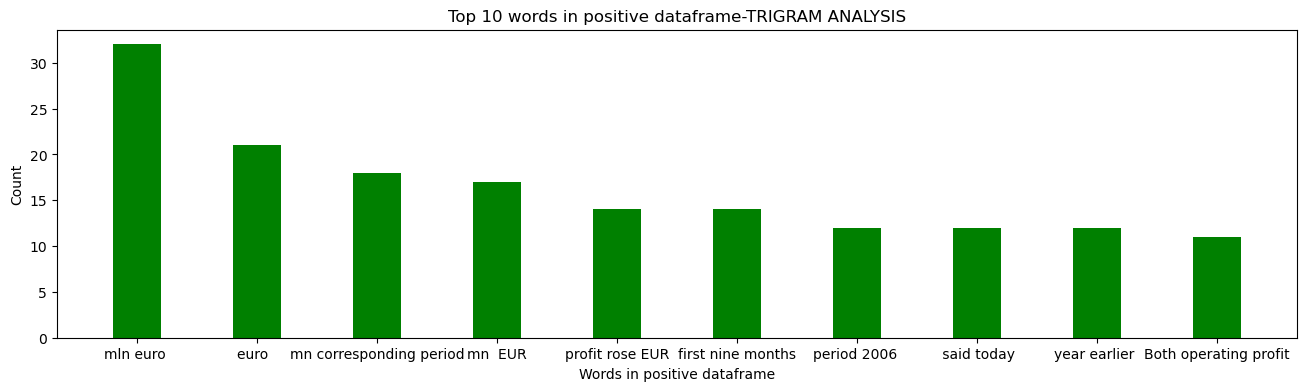

In [75]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green', width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

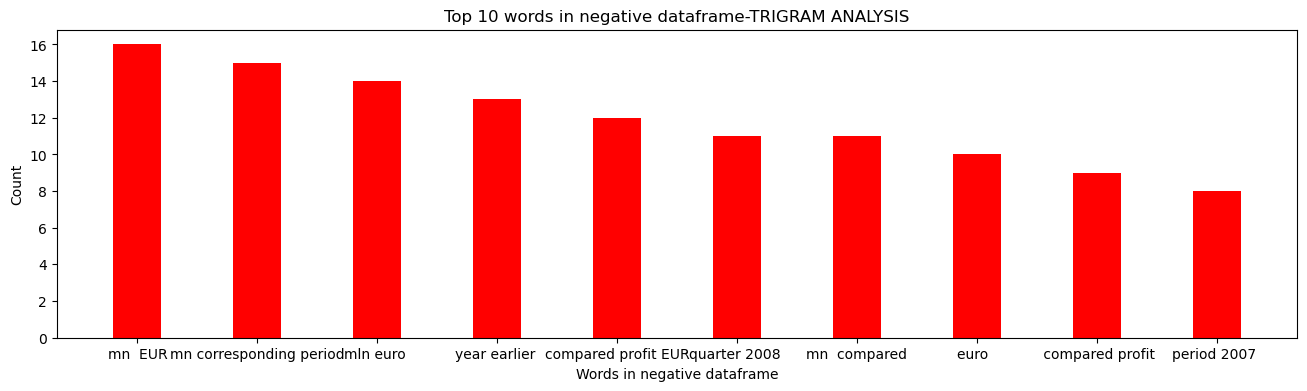

In [76]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red', width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

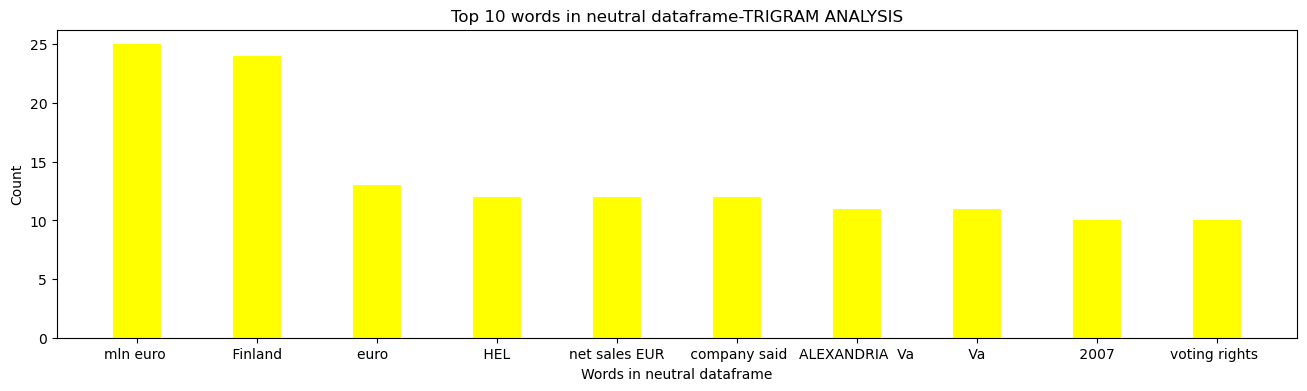

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow', width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

# Creating 4-grams¶
Repeat the same steps which we followed to analyze our data using unigrams, except that you have to pass parameter 3 while invoking the generate_N_grams() function. You can optionally consider changing the names of the data frames, which I have done.

In [83]:
positiveValues4=defaultdict(int)
negativeValues4=defaultdict(int)
neutralValues4=defaultdict(int)

In [85]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,4):
        positiveValues4[word]+=1


Sentence after removing stopwords: ['Clothing', 'retail', 'chain', 'SeppÆlÆ', 'sales', 'increased', '8', '', 'EUR', '1552', 'mn', '', 'operating', 'profit', 'rose', 'EUR', '311', 'mn', 'EUR', '171', 'mn', '2004', '']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', '', 'respectively', 'EUR16', '0', 'EUR139m', '', 'compared', 'corresponding', 'quarter', '2006', '']
Sentence after removing stopwords: ['Sponda', 'record', 'profit', 'sale', '85', 'mln', 'euro', '', '124', 'mln']
Sentence after removing stopwords: ['Metso', 'expects', 'net', 'sales', 'increase', '10', '', '2008', '', 'comparable', 'exchange', 'rates', '']
Sentence after removing stopwords: ['Metso', 'said', 'order', 'worth', 'around', '40', 'mln', 'eur', 'supply', 'kraftliner', 'board', 'machine', 'China', 'Lee', '', 'Man', 'Paper', 'Co', '']
Sentence after removing stopwords: ['OLeary', 'Material', 'Handling', 'Services', '', 'located', 'Perth', '', 'le

Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2009', '', 'Orion', 'net', 'profit', 'went', '338', '', 'yearonyear', 'EUR33m', '']
Sentence after removing stopwords: ['The', 'training', 'modules', 'aim', 'strengthening', 'public', 'accounting', 'abilities', 'fulfilling', 'communal', 'project', 'management', '']
Sentence after removing stopwords: ['The', 'company', 'goal', 'achieve', 'annual', 'savings', 'EUR', '2', 'million', '', 'USD', '27', '', '', 'two', 'thirds', 'realized', '2010', '']
Sentence after removing stopwords: ['The', 'cooperation', 'double', 'The', 'Switch', 'converter', 'capacity', '']
Sentence after removing stopwords: ['The', 'offer', 'represents', 'premium', '24', '', 'stock', 'closing', 'price', 'Friday', '']
Sentence after removing stopwords: ['This', 'location', 'makes', 'mall', 'convenient', 'place', 'shop', 'consumers', 'three', 'large', 'residential', 'areas', 'nearby', '', 'Jaroszowka', '', 'Wysockiego', 'Zgody', '']
Sentence after removing s

Sentence after removing stopwords: ['EPS', 'quarter', 'came', '036', 'eur', '', '033', 'eur', 'year', 'ago', 'ahead', 'forecast', '033', 'eur', '']
Sentence after removing stopwords: ['', 'After', 'long', '', 'unprofitable', 'period', 'Food', 'Division', 'posted', 'profitable', 'result', '', 'speaks', 'healthier', 'cost', 'structure', 'new', 'approach', 'business', 'operations', '', '', 'Rihko', 'said', '']
Sentence after removing stopwords: ['The', 'members', 'management', 'team', 'contribute', 'adjustment', 'measures', 'temporary', 'salary', 'cut', '5', '', '']
Sentence after removing stopwords: ['Last', 'year', 'net', 'sales', 'rose', 'EUR', '683', 'million', 'EUR', '622', 'million', '']
Sentence after removing stopwords: ['During', 'past', 'decade', 'gradually', 'divested', 'noncore', 'assets', 'bought', 'several', 'sports', 'equipment', 'makers', '', 'including', 'Californiabased', 'Fitness', 'Products', 'International', 'Sparks', '', 'Nevadabased', 'ATEC', '', 'leading', 'maker',

Sentence after removing stopwords: ['KalnapilioTauro', 'Grupe', '', 'KalnapilisTauras', 'Group', '', '', 'owned', 'Denmark', 'Royal', 'Unibrew', '', 'raised', 'market', 'share', '2518', 'percent', '2374', 'percent', '', 'beer', 'sales', 'seven', 'months', 'jumped', '145', 'percent', '405', 'million', 'liters', '']
Sentence after removing stopwords: ['Ramirent', 'leading', 'company', 'machinery', 'equipment', 'rentals', 'construction', 'industry', '']
Sentence after removing stopwords: ['Consolidated', 'net', 'sales', 'increased', '16', '', 'reach', 'EUR74', '8', '', 'operating', 'profit', 'amounted', 'EUR0', '9', 'compared', 'loss', 'EUR0', '7', 'prior', 'year', 'period', '']
Sentence after removing stopwords: ['Actions', 'improve', 'operational', 'efficiency', 'adjust', 'operations', 'expected', 'deliver', 'annualised', 'permanent', 'cost', 'savings', 'around', 'EUR', '45', 'million', 'effected', 'mostly', 'first', 'half', '2010', '']
Sentence after removing stopwords: ['', 'The', 'se

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,4):
        negativeValues4[word]+=1

Sentence after removing stopwords: ['Earnings', 'per', 'share', '', 'EPS', '', 'amounted', 'loss', 'EUR0', '06', '']
Sentence after removing stopwords: ['Finnish', 'metal', 'products', 'company', 'Componenta', 'Oyj', 'net', 'profit', 'went', 'slightly', '251', 'mln', 'euro', '', '', '402', 'mln', '', 'first', 'half', '2008', '254', 'mln', 'euro', '', '', '407', 'mln', '', 'period', '2007', '']
Sentence after removing stopwords: ['Finnair', 'believes', 'strike', 'cause', 'daily', 'net', 'losses', 'excess', 'EUR', '2mn', 'due', 'canceled', 'reservations', 'passenger', 'rerouting', '']
Sentence after removing stopwords: ['At', '1201', 'pm', '', 'OMX', 'Helsinki', '25', '066', 'pct', '314357', 'OMX', 'Helsinki', '067', 'pct', 'lower', '1053074', '253', 'mln', 'eur', 'turnover', '']
Sentence after removing stopwords: ['Konecranes', 'previously', 'communicated', 'estimated', 'reduction', '1600', 'employees', 'group', 'level', '2009', '']
Sentence after removing stopwords: ['Operating', 'prof

Sentence after removing stopwords: ['ADP', 'News', '', 'May', '29', '', '2009', '', 'Bank', 'America', 'BofA', 'downgraded', 'today', 'ratings', 'SwedishFinnish', 'paper', 'maker', 'Stora', 'Enso', 'Oyj', 'HEL', '', 'STERV', 'Finnish', 'sector', 'player', 'UPMKymmene', 'Oyj', 'HEL', '', 'UPM1V', '', 'underperf']
Sentence after removing stopwords: ['Operating', 'profit', 'sixmonth', 'period', 'decreased', 'EUR21m', '', 'net', 'sales', 'increased', 'EUR436', '9', '', 'compared', 'corresponding', 'period', '2007', '']
Sentence after removing stopwords: ['Earlier', 'today', '', 'Geberit', 'Finnish', 'rival', 'Uponor', 'OYJ', 'cut', 'fullyear', 'sales', 'growth', 'forecast', '6', 'pct', '10', 'pct', '', 'blaming', 'tough', 'conditions', 'Germany', 'US', '', 'well', 'currency', 'factors', '']
Sentence after removing stopwords: ['Samsung', 'currently', 'occupies', 'third', 'place', 'lost', 'ground', 'quarter', '', 'dropping', '18', '', '111', '', 'share', 'overall', '']
Sentence after removin

In [87]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,4):
        neutralValues4[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register', '']
Sentence after removing stopwords: ['Benefon', 'turn', 'Salo', 'unit', 'B2B', 'business', 'unit', 'establish', 'B2C', 'business', 'unit', 'UK', '']
Sentence after removing stopwords: ['The', 'order', 'also', 'includes', 'extensive', 'maintenance', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'Central', 'Eastern', 'European', 'growth', 'strategy', '']
Sentence after removing stopwords: ['Elcoteq', 'global', 'network', 'After', 'Market', 'Service', 'sites', 'long', 'experience', 'serving', 'Consumer', 'Electronics', 'Systems', 'Solutions', 'customers', '']
Sentence after removing stopwords: ['COMPTEL', 'CORPORATION', 'Sami', 'Ervio', 'President', 'CEO', 'Distribution', '', 'NASDAQ', 'OMX', 'Helsinki', 'Major', 'media', 'Comp

Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damage', 'gave', 'vessel', 'permission', 'continue', 'Tallinn', 'around', '430', 'The', 'Norwegianregistered', 'MT', 'Sten', 'Nordic', 'carrying', '11000', 'tons', 'gas', 'oil', 'manned', 'Filipino', 'crew', '']
Sentence after removing stopwords: ['HKScan', '', 'headquartered', 'Turku', '', 'Finland', '', 'leading', 'northern', 'European', 'food', 'group', '10000', 'employees', 'nine', 'countries', '']
Sentence after removing stopwords: ['The', 'business', 'area', 'operations', 'Finland', '', 'Sweden', '', 'Denmark', '', 'Estonia', '', 'Latvia', 'Lithuania', '']
Sentence after removing stopwords: ['In', 'spring', '2006', '', 'total', '386530', 'Stock', 'Options', '2002', 'B', 'annulled', '']
Sentence after removing stopwords: ['Stichting', 'Pensioenfonds', 'ABP', '', '4', '118', '122', 'shares', 'representing', '519', '', 'share', 'capital', 'voting', 'rights', '']
Sentence after removing stopwords: ['The', 'busi

Sentence after removing stopwords: ['The', 'new', 'system', '', 'include', '60', 'MC3090', 'PDAs', 'Motorola', '', 'used', '60', 'Poundstretcher', 'operatives', 'across', '3', 'shifts', '', 'integrate', 'realtime', 'company', 'existing', 'Warehouse', 'Management', 'System', '', 'Aldata', 'GOLD', 'Stock', '', 'went', 'live', 'May', '2008', '']
Sentence after removing stopwords: ['Tyrvaan', 'Sanomat', '', 'published', 'twice', 'week', 'Tyrvaan', 'Sanomat', 'Oy', '', 'appears', 'Sastamala', 'Kiikoinen', '']
Sentence after removing stopwords: ['It', 'also', 'includes', 'installation', 'new', 'equipment', '', 'training', 'startup', 'services', '', 'well', 'service', 'work', 'shoe', 'press', 'delivered', 'Vaahto', '2001', '']
Sentence after removing stopwords: ['The', 'deal', 'covers', 'Stockmann', 'Auto', 'Oy', 'Ab', 'sales', 'aftersales', 'services', 'concerning', 'Volkswagen', 'Audi', 'Helsinki', '', 'Espoo', 'Vantaa', '']
Sentence after removing stopwords: ['The', 'machinery', 'ordered',

Sentence after removing stopwords: ['The', 'use', 'case', 'dramatically', 'narrows', 'go', 'hot', 'Ltd']
Sentence after removing stopwords: ['The', 'Finnish', 'real', 'estate', 'investment', 'company', 'Interavanti', 'Oyj', 'said', 'Monday', '', '22', 'September', '', 'agreed', 'sell', '65', '', 'ownership', 'Finnish', 'ticket', 'service', 'company', 'Lippupiste', 'Oy', 'CTS', 'Eventim', 'AG', '', '561', '', '', 'managing', 'director', 'Lippupiste', 'Oy', '']
Sentence after removing stopwords: ['The', 'product', 'range', 'includes', 'marinated', 'olives', '', 'cold', 'cuts', '', 'pates', '', 'example', '']
Sentence after removing stopwords: ['Customers', 'wide', 'range', 'industries', 'use', 'stainless', 'steel', 'services', 'worldwide', '']
Sentence after removing stopwords: ['The', 'duration', 'layoffs', 'per', 'employee', 'vary', 'one', 'six', 'weeks', '']
Sentence after removing stopwords: ['Upon', 'completion', 'sale', 'Proha', 'would', 'get', 'USD12', '7', 'stake', 'Artemis', '']

Sentence after removing stopwords: ['The', 'percentages', 'shares', 'voting', 'rights', 'calculated', 'proportion', 'total', 'number', 'shares', 'registered', 'Trade', 'Register', 'total', 'number', 'voting', 'rights', 'related', '']
Sentence after removing stopwords: ['The', 'company', 'try', 'adapt', 'operations', 'temporary', 'layoffs', 'different', 'duration', '', 'working', 'hour', 'arrangements', '', 'training', 'development', 'efforts', '']
Sentence after removing stopwords: ['The', 'Point', 'Village', '', 'designed', 'Scott', 'Tallon', 'Walker', '', 'include', 'shopping', 'center', '', 'office', 'premises', '', 'hotel', 'cinema', '']
Sentence after removing stopwords: ['One', 'price', 'category', 'calls', 'preferred', 'operator', 'network', '', 'another', 'calls', 'operators', '', 'networks', '']
Sentence after removing stopwords: ['Under', 'agreement', 'Benefon', 'forthcoming', 'range', 'TWIG', 'integrated', 'GPS', 'navigation', 'mobile', 'phone', 'devices', 'use', 'jointly', 

Sentence after removing stopwords: ['Through', 'partnership', 'Finnish', 'Paulig', 'Danish', 'subsidiary', 'Oscar', '', 'Puljonki', 'acquired', 'sales', 'organization', 'European', 'market', '']
Sentence after removing stopwords: ['Glaston', 'also', 'efficiency', 'measures', 'units', '']
Sentence after removing stopwords: ['The', 'share', 'capital', 'Alma', 'Media', 'Corporation', 'business', 'ID', '19447574is', 'EUR', '4503151380', 'divided', '75052523', 'shares', '']
Sentence after removing stopwords: ['Efore', 'decided', 'establish', 'company', 'eletric', 'vehicle', '', 'EV', '', 'business', 'China', '']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'fell', '352', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '06', '', '']
Sentence after removing stopwords: ['The', 'value', 'order', 'EUR', '30mn', '']
Sentence after removing stopwords: ['Quality', 'chargers', 'CHARGZ', 'brand', 'sold', 'selected', 'retail', 'stores', 'sales', 'lo

Sentence after removing stopwords: ['The', 'executive', 'said', 'countries', 'Brazil', '', 'Chile', '', 'Argentina', 'Mexico', 'lead', 'adoption', 'business', 'Ethernet', 'services', 'segment', '', 'Brazil', 'Mexico', 'early', 'adopters', 'carrier', 'Ethernet', 'mobile', 'backhaul', '']
Sentence after removing stopwords: ['After', 'acquisition', '', 'Basware', 'preliminary', 'pro', 'forma', 'net', 'sales', '2005', 'amount', 'EUR', '526', 'mn', '', 'preliminary', 'pro', 'forma', 'operating', 'profit', 'amounts', 'EUR', '71', 'mn', '']
Sentence after removing stopwords: ['Martela', 'front', 'runner', 'providing', 'innovative', 'solutions', 'customer', 'service', 'Martela', 'designs', 'supplies', 'interior', 'solutions', 'working', 'environments', 'public', 'spaces', '']
Sentence after removing stopwords: ['Following', 'transaction', '', 'Tulikivi', 'restructured', 'operations', 'Soapstone', 'Fireplaces', 'Business', '', 'Natural', 'Stone', 'Product', 'Business', 'Ceramic', 'Products', 'B

In [88]:
df_positive4=pd.DataFrame(sorted(positiveValues4.items(),key=lambda x:x[1],reverse=True))
df_negative4=pd.DataFrame(sorted(negativeValues4.items(),key=lambda x:x[1],reverse=True))
df_neutral4=pd.DataFrame(sorted(neutralValues4.items(),key=lambda x:x[1],reverse=True))


In [89]:
pd14=df_positive4[0][:10]
pd24=df_positive4[1][:10]
ned14=df_negative4[0][:10]
ned24=df_negative4[1][:10]
nud14=df_neutral4[0][:10]
nud24=df_neutral4[1][:10]

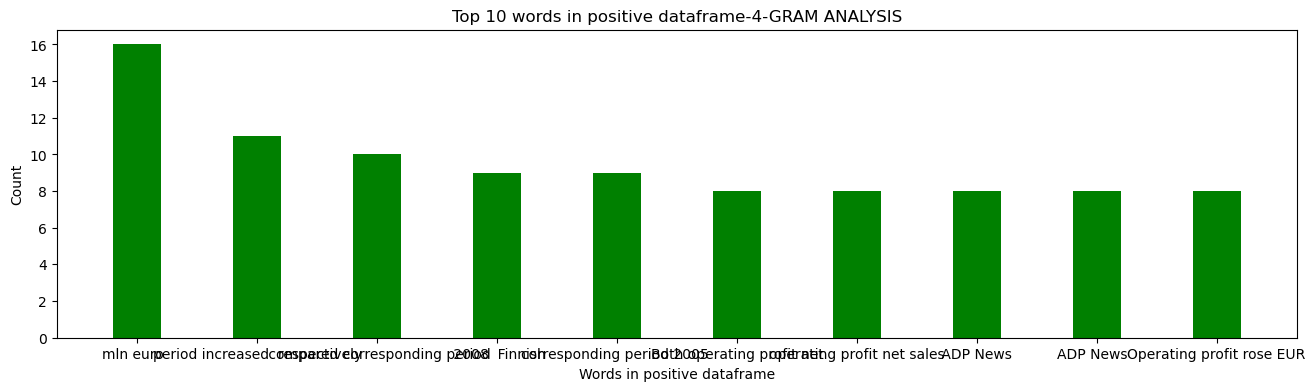

In [90]:
plt.figure(1,figsize=(16,4))
plt.bar(pd14,pd24, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-4-GRAM ANALYSIS")
plt.savefig("positive-4-gram.png")
plt.show()


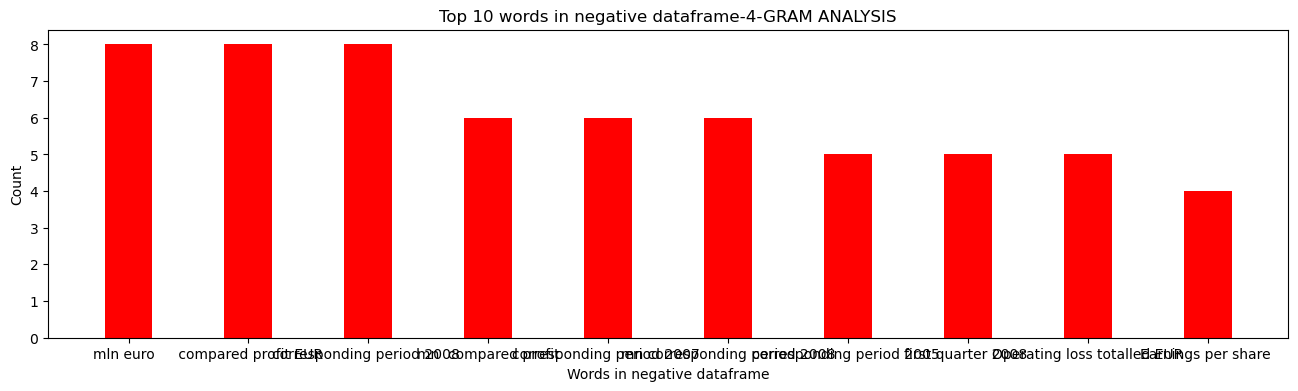

In [91]:
plt.figure(1,figsize=(16,4))
plt.bar(ned14,ned24, color ='red', width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-4-GRAM ANALYSIS")
plt.savefig("negative-4-gram.png")
plt.show()

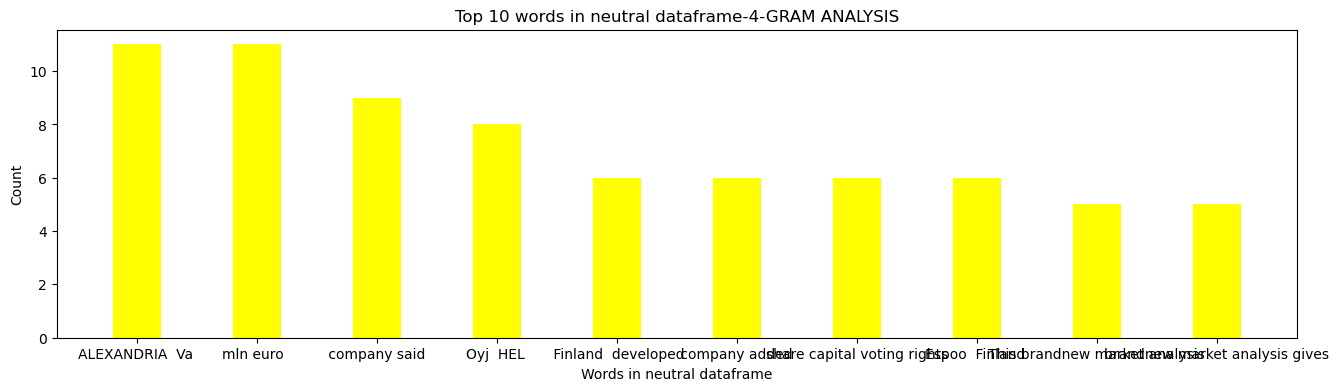

In [92]:
plt.figure(1,figsize=(16,4))
plt.bar(nud14,nud24, color ='yellow', width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-4-GRAM ANALYSIS")
plt.savefig("neutral-4-gram.png")
plt.show()

In [19]:
from collections import defaultdict
from nltk.util import ngrams
import operator

# Sample text corpus
text = "this is a sample text corpus for n-gram analysis. n-grams help in language modeling."

# Tokenize the text into words
words = text.split()

# Initialize dictionaries to store n-gram counts for different values of n
ngram_counts = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int), 4: defaultdict(int)}

# Create n-grams for n=1, 2, 3, 4
for n in range(1, 5):
    n_grams = ngrams(words, n)
    for ngram in n_grams:
        print(ngram)
        ngram_counts[n][ngram] += 1
        
# print(ngram_counts)

# Calculate probabilities for each n-gram
ngram_probabilities = {n: {} for n in range(1, 5)}
for n in range(1, 5):
    total_ngrams = sum(ngram_counts[n].values())
    for ngram, count in ngram_counts[n].items():
        probability = count / total_ngrams
        ngram_probabilities[n][ngram] = probability

# Find the top 10 most likely n-grams for each n
top_10_ngrams = {n: dict(sorted(ngram_probabilities[n].items(), key=operator.itemgetter(1), reverse=True)[:10]) for n in range(1, 5)}


('this',)
('is',)
('a',)
('sample',)
('text',)
('corpus',)
('for',)
('n-gram',)
('analysis.',)
('n-grams',)
('help',)
('in',)
('language',)
('modeling.',)
('this', 'is')
('is', 'a')
('a', 'sample')
('sample', 'text')
('text', 'corpus')
('corpus', 'for')
('for', 'n-gram')
('n-gram', 'analysis.')
('analysis.', 'n-grams')
('n-grams', 'help')
('help', 'in')
('in', 'language')
('language', 'modeling.')
('this', 'is', 'a')
('is', 'a', 'sample')
('a', 'sample', 'text')
('sample', 'text', 'corpus')
('text', 'corpus', 'for')
('corpus', 'for', 'n-gram')
('for', 'n-gram', 'analysis.')
('n-gram', 'analysis.', 'n-grams')
('analysis.', 'n-grams', 'help')
('n-grams', 'help', 'in')
('help', 'in', 'language')
('in', 'language', 'modeling.')
('this', 'is', 'a', 'sample')
('is', 'a', 'sample', 'text')
('a', 'sample', 'text', 'corpus')
('sample', 'text', 'corpus', 'for')
('text', 'corpus', 'for', 'n-gram')
('corpus', 'for', 'n-gram', 'analysis.')
('for', 'n-gram', 'analysis.', 'n-grams')
('n-gram', 'analy

In [ ]:
# Print the results
for n in range(1, 5):
    print(f"Top 10 {n}-grams:")
    for ngram, probability in top_10_ngrams[n].items():
        print(f"{' '.join(ngram)} - Probability: {probability:.4f}")
    print()